***Data Pre-Processor***


In [1]:
%run DeepFake_Dataloader.py
%run utils.py

In [2]:
import h5py
import torch
import numpy as np

In [3]:
# batch_sz = 128 
batch_sz = 10
dataloader = get_preprocessors(batch_size=batch_sz)
total_imgs = len(dataloader) * batch_sz
print(total_imgs)
total_imgs = !find {img_root} -type f -iname "*.png" | wc -l
total_imgs = int(total_imgs[0])
print(total_imgs)

('Classes: '
 "['lsun_bedrooms', "
 "'lsun_cats', "
 "'lsun_churches', "
 "'stylegan1_bedrooms', "
 "'stylegan2_cats', "
 "'stylegan2_churches']")
('Indices: '
 "{'lsun_bedrooms': "
 "0, 'lsun_cats': "
 '1, '
 "'lsun_churches': "
 '2, '
 "'stylegan1_bedrooms': "
 '3, '
 "'stylegan2_cats': "
 '4, '
 "'stylegan2_churches': "
 '5}')
60010
60002


In [ ]:
progress = ProgressMonitor(length=total_imgs)
rad_len  = 182
with h5py.File('LSUN_BCC_256.hdf5', 'w') as f:
    """
        Create HDF5 datasets 
    """
    data_dset = f.create_dataset('fft_data',  (total_imgs, rad_len), dtype='f')
    lbl_dset  = f.create_dataset('lbl_data',  (total_imgs,),     dtype='i')
    orgn_dset = f.create_dataset('orgn_data', (total_imgs,),     dtype='i')
    img_size  = f.create_dataset('img_size',  (total_imgs,),     dtype='i')
    data_size = f.create_dataset('data_size', (total_imgs,),     dtype='i')
    
    for i, (img_data, target, origin_dataset, _, _) in enumerate(dataloader):
        start_idx = i * batch_sz
        for j in range(img_data.shape[0]):
            idx = start_idx + j
            progress.update(1, 0)
            if (target[j] > 1):
                print(target[j])
            data_dset[idx] = img_data[j]
            lbl_dset[idx]  = target[j]
            orgn_dset[idx] = data_origin[origin_dataset[j]]
            img_size[idx]  = data_img_size[origin_dataset[j]]
            data_size[idx] = rad_size[origin_dataset[j]]
        

In [ ]:
import matplotlib.pyplot as plt


with h5py.File('LSUN_BCC_256.hdf5', 'r') as f:
    dset = f['fft_data']
    plt.plot(dset[200])
    for i in range(10):
        plt.plot(dset[np.random.randint(20000)])
#         plt.show()
    plt.show()

In [ ]:
with h5py.File('LSUN_Cars.hdf5', 'r') as f:
    dset = f['lbl_data']
    for i in range(len(dset)):
        if dset[i] != 1 and dset[i] != 0:
            print(dset[i])

In [ ]:
!gcloud auth activate-service-account --key-file ./playground-270702-4d2df0765336.json

In [ ]:
# auth.authenticate_user()

project_id = 'playground-270702'
!gcloud config set project {project_id}
!gsutil ls

bucket_name = 'img-hosting-bucket'
!gsutil -m cp -r /home/jupyter/CSE253_FinalProject/LSUN_BCC_256.hdf5 gs://{bucket_name}/

In [ ]:
!wget https://storage.googleapis.com/img-hosting-bucket/LSUN_BCC_256.hdf5

<class 'torch.Tensor'>
torch.Size([10, 256, 256])
torch.Size([256, 256])
('stylegan2_cats', 'lsun_bedrooms', 'lsun_churches', 'lsun_cats', 'lsun_cats', 'stylegan2_cats', 'stylegan2_churches', 'lsun_churches', 'lsun_bedrooms', 'lsun_bedrooms')
tensor([1, 0, 0, 0, 0, 1, 1, 0, 0, 0])
[114 116 119 121 122 121 121 121 121 120 121 121 120 119 120 122 125 127
 127 129 131 133 135 134 133 136 135 135 137 137 137 137 136 137 139 140
 141 144 146 147 148 148 150 153 153 151 153 151 123  87  83  85  78  82
  88  86  83  85  90  95 109 125 136 146 150 150 147 150 149 147 144 142
 142 141 141 141 138 138 139 136 134 133 133 136 138 141 134 143 142 140
 140 140 139 142 146 145 140 141 137 141 142 141 145 140 140 152 147 146
 147 144 145 151 145 147 145 147 143 145 145 148 146 152 152 149 150 149
 145 148 149 149 155 154 148 151 151 151 149 149 151 153 158 146 146 152
 152 154 154 152 151 155 151 152 154 152 151 154 155 157 158 158 158 157
 156 157 157 156 157 154 155 156 155 154 156 158 158 156 151 

AttributeError: 'list' object has no attribute 'imshow'

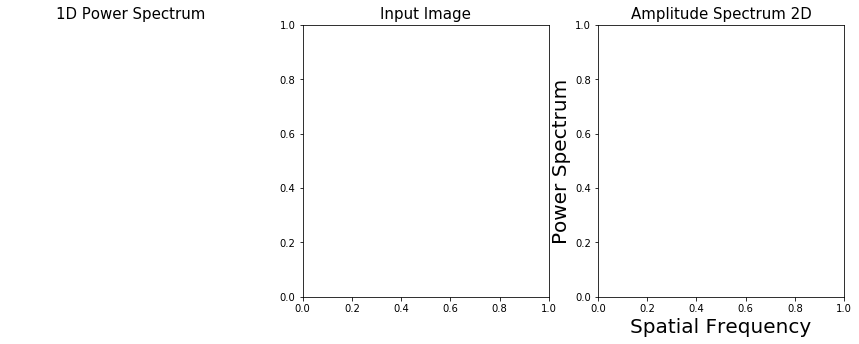

In [26]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random
from torchvision import transforms

file_name = 'class_1'

classes = {
    'stylegan2_cats': False,
    'stylegan2_cars': False,
    'stylegan2_churches': False,
    'lsun_cats': False,
    'lsun_cars': False,
    'lsun_bedrooms': False,
    'stylegan1_bedrooms': False,
    'lsun_churches': False,
    'celebA-HQ_10K': False,
    'Flickr-Faces-HQ_10K': False,
    'thispersondoesntexists_10K': False,
    '100KFake_10K': False,
}

# for i, (img_data, target, origin_dataset, img, ms_img) in enumerate(dataloader):
#     if (i == 1):
#         print(type(ms_img))
#         img    = transforms.ToPILImage()(img[0]).convert('RGB')
#         ms_img = transforms.ToPILImage()(ms_img[0]).convert('RGB')
#         display(img)
#         display(ms_img)
#         plt.figure()
#         plt.plot(img_data[0]) 
#         plt.show()
#         break
(img_data, target, origin_dataset, img, ms_img) = next(iter(dataloader))
print(type(ms_img))
print(ms_img.size())
print(ms_img[0].size())
print(origin_dataset)
print(target)
# img    = transforms.ToPILImage()(img[0]).convert('RGB')
# ms_img = transforms.ToPILImage()(ms_img[0]).convert('RGB')
# display(img)
# img.save(file_name + '-img.jpg')

print(img[0][0].numpy())
fig = plt.figure(figsize=(15,5))
ax  = fig.add_subplot(132)
ax3 = fig.add_subplot(131)
plt.axis('off')
ax2 = fig.add_subplot(133)
ax.set_title('Input Image',size=15)
ax2.set_title('Amplitude Spectrum 2D', size=15)
ax3.set_title('1D Power Spectrum',size=15)
plt.xlabel('Spatial Frequency', fontsize=20)
plt.ylabel('Power Spectrum', fontsize=20)
ax1.imshow(img[0].numpy()[0])
ax2.imshow(ms_img[0])
ax2.plot(img_data[0])yyyyyyy
plt.show()

plt.savefig(file_name + '.jpg')